<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/Easy_Network_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - First Fully connected network with Keras

Author: Umberto Michelucci (umberto.michelucci@toelt.ai)

## Exercises

### Exercise 1:
Try to increase the network size (increasing the number of layers and number of neurons) and see if you get better results.

### Exercise 2:
Try to reduce the network size to just one neuron. What kind of neuron do you need to use (activation function, output, etc.) to classify the images? And what results do you get?

### Exercise 3:
Check for overfitting. Is the network overfitting? Can you tell?

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Text(0.5, 1.0, 'Label is 9')

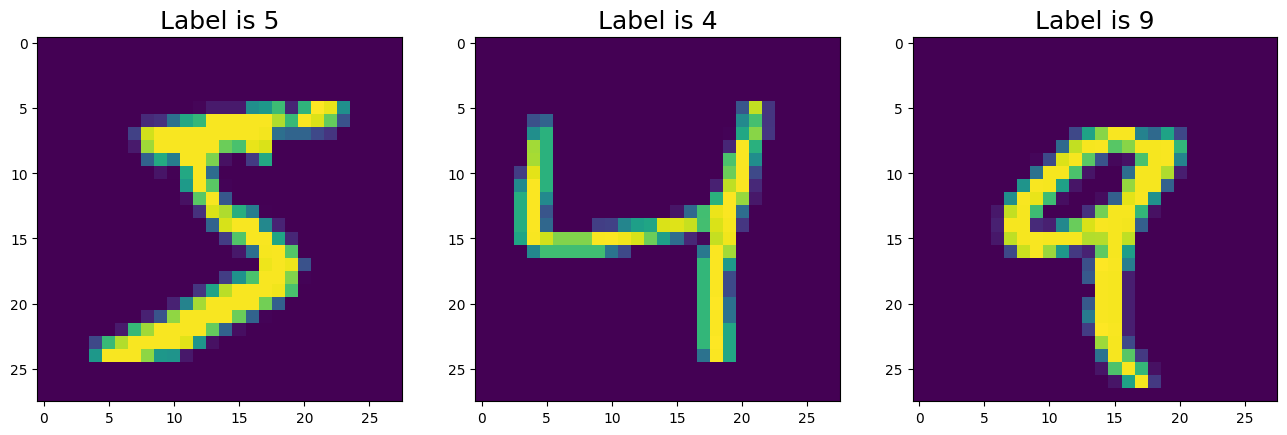

In [4]:
fig = plt.figure(figsize = (16,5))
fig.add_subplot(1,3,1)
plt.imshow(x_train[0])
plt.title("Label is "+ str(y_train[0]), fontsize = 18)
fig.add_subplot(1,3,2)
plt.imshow(x_train[2])
plt.title("Label is "+ str(y_train[2]), fontsize = 18)
fig.add_subplot(1,3,3)
plt.imshow(x_train[4])
plt.title("Label is "+ str(y_train[4]), fontsize = 18)

## Sequential model

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/Users/umbertomichelucci/envs/venv310/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.8585 - loss: 0.4865 - val_accuracy: 0.9522 - val_loss: 0.1558
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - accuracy: 0.9548 - loss: 0.1496 - val_accuracy: 0.9686 - val_loss: 0.1025
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - accuracy: 0.9665 - loss: 0.1098 - val_accuracy: 0.9747 - val_loss: 0.0858
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.9733 - loss: 0.0870 - val_accuracy: 0.9752 - val_loss: 0.0855
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.9774 - loss: 0.0729 - val_accuracy: 0.9770 - val_loss: 0.0772
313/313 - 0s - 393us/step - accuracy: 0.9770 - loss: 0.0772


[0.07717874646186829, 0.9769999980926514]

In [7]:
print(history.history)

{'accuracy': [0.9134833216667175, 0.9565500020980835, 0.9669166803359985, 0.9725000262260437, 0.9769999980926514], 'loss': [0.29824885725975037, 0.14458175003528595, 0.10812891274690628, 0.08837184309959412, 0.0740327388048172], 'val_accuracy': [0.9521999955177307, 0.9685999751091003, 0.9746999740600586, 0.9751999974250793, 0.9769999980926514], 'val_loss': [0.1557653397321701, 0.10249671339988708, 0.08584938198328018, 0.08548258244991302, 0.07717874646186829]}


Let's check how the network is learning by plotting the loss function for the training and test datasets. This is a handy way to check if there is any overfitting or if the network is not learning properly.

### Learning Assessment

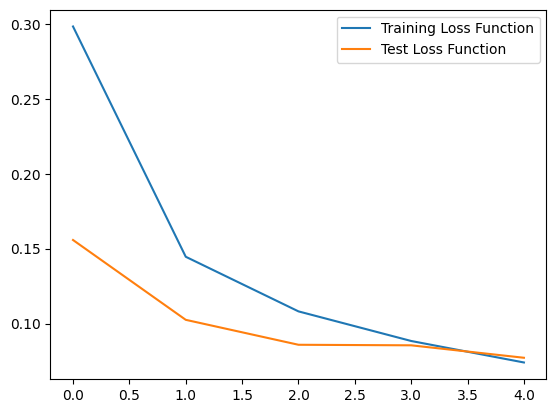

In [8]:
plt.plot(history.history['loss'], label = 'Training Loss Function')
plt.plot(history.history['val_loss'], label = 'Test Loss Function')
plt.legend()
plt.show()

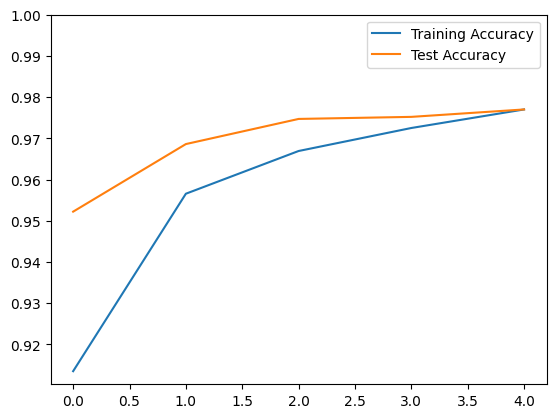

In [9]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.ylim(None, 1)
plt.legend()
plt.show()

### Prediction check

In [10]:
model.predict(x_train[0][np.newaxis,:])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([3.7200881e-10, 5.5763874e-08, 3.7589142e-08, 4.7490180e-02,
       1.5583656e-18, 9.5250946e-01, 1.2535567e-13, 3.6739717e-10,
       2.8159058e-10, 3.7239877e-07], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


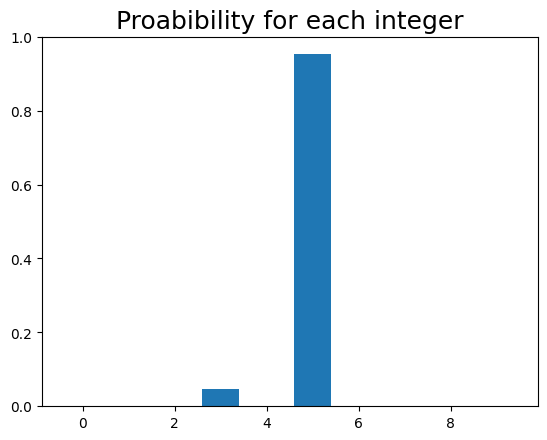

In [11]:
plt.bar(np.arange(0,10,1), model.predict(x_train[0][np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 18)
plt.show()

## Functional APIs

Networks can be built with the Sequential approach by using the ```Sequential()``` constructor, or by using functional API, as shown below. The functional API will give much more flexibility to build more flexible network architectures.

In [12]:
input = tf.keras.layers.Input(shape = (28,28), name = 'Input_Layer')
layer = tf.keras.layers.Flatten()(input)
layer = tf.keras.layers.Dense(128, activation='relu')(layer)
layer = tf.keras.layers.Dropout(0.2)(layer)
layer = tf.keras.layers.Dense(10, activation='softmax')(layer)

model = tf.keras.models.Model(inputs=input, outputs=layer)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.8523 - loss: 0.4985 - val_accuracy: 0.9600 - val_loss: 0.1349
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - accuracy: 0.9534 - loss: 0.1537 - val_accuracy: 0.9700 - val_loss: 0.1036
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.9688 - loss: 0.1036 - val_accuracy: 0.9736 - val_loss: 0.0878
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.9722 - loss: 0.0876 - val_accuracy: 0.9757 - val_loss: 0.0788
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - accuracy: 0.9770 - loss: 0.0714 - val_accuracy: 0.9778 - val_loss: 0.0739
313/313 - 0s - 408us/step - accuracy: 0.9778 - loss: 0.0739


[0.07392697781324387, 0.9778000116348267]

In [15]:
model.predict(x_train[0][np.newaxis,:])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([9.85739476e-11, 1.06681886e-10, 9.84577397e-09, 3.11510474e-03,
       6.36157054e-19, 9.96884882e-01, 1.95263442e-13, 1.37486456e-09,
       2.93356290e-12, 9.02138542e-09], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


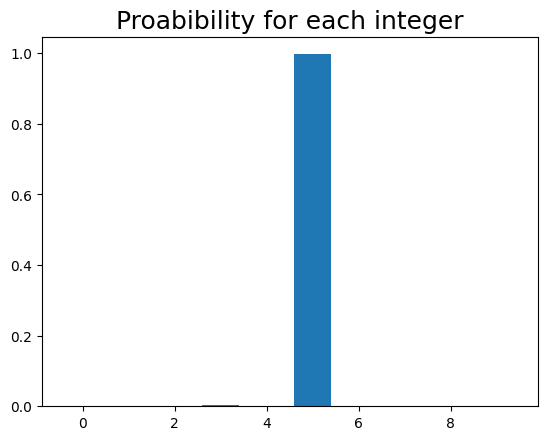

In [16]:
plt.bar(np.arange(0,10,1), model.predict(x_train[0][np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 18)
plt.show()

In [17]:
print(y_train[0])

5


## Custom Training Loop - Advanced (can be skipped)

In [18]:
input = tf.keras.layers.Input(shape = (28,28), name = 'Input_Layer')
layer = tf.keras.layers.Flatten()(input)
layer = tf.keras.layers.Dense(128, activation='relu')(layer)
layer = tf.keras.layers.Dropout(0.2)(layer)
layer = tf.keras.layers.Dense(10, activation='softmax')(layer)

model = tf.keras.models.Model(inputs=input, outputs=layer)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
batch_size = 32

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
val_dataset = val_dataset.batch(batch_size)

In [20]:
epochs = 5
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))


Start of epoch 0
Training loss (for one batch) at step 0: 2.4094
Seen so far: 32 samples


/Users/umbertomichelucci/envs/venv310/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Training loss (for one batch) at step 200: 2.3000
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 2.0924
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 2.0061
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 1.7539
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 1.7777
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 1.5528
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 1.5890
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 1.3413
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 1.2004
Seen so far: 57632 samples


2025-06-10 16:23:38.511608: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 1
Training loss (for one batch) at step 0: 1.3778
Seen so far: 32 samples
Training loss (for one batch) at step 200: 1.4418
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 1.4589
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 1.1974
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 0.9105
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 1.0297
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.9531
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 1.2471
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 1.0339
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.9819
Seen so far: 57632 samples


2025-06-10 16:23:44.738361: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 2
Training loss (for one batch) at step 0: 0.9027
Seen so far: 32 samples
Training loss (for one batch) at step 200: 1.0036
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.7819
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 0.9161
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 0.8462
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 0.5408
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.7611
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 0.6448
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.6296
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.4397
Seen so far: 57632 samples

Start of epoch 3
Training loss (for one batch) at step 0: 0.8208
Seen so far: 32 samples
Training loss (for one batch) at step 200: 0.6420
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.51

2025-06-10 16:23:56.913170: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 4
Training loss (for one batch) at step 0: 0.5771
Seen so far: 32 samples
Training loss (for one batch) at step 200: 0.7951
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.6988
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 0.4383
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 0.5531
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 0.5165
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.7772
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 0.6080
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.6003
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.4703
Seen so far: 57632 samples


In [21]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8623 - loss: 0.5334


[0.470271497964859, 0.8838000297546387]